In [56]:
import numpy as np
import pandas as pd
import re

In [57]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [58]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [59]:
df.duplicated().sum()

122

In [60]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,satya element one,sector 49,0.8,11111.0,720.0,Built Up area: 720 (66.89 sq.m.),1,1,1,not available,0.0,NaN,undefined,"['Standard chartered ATM', 'Icici bank ATM', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vatsalya Clinic', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Samvit Health Care', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'SPAZE BUSINESS PARK', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'SRS Cinemas', 'SRS Cinemas', 'Haldiram', 'India', ""Domino's Pizza"", ""Nirula's"", 'Madison and Pike', 'Nook', 'Starbucks', 'Kamla International', 'Delhi Public School Primary Section', 'Gurugram University', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN


# 1. areaWithType

In [61]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1241,3.75,2800.0,Super Built up area 2800(260.13 sq.m.)
2517,0.95,1956.0,Super Built up area 1956(181.72 sq.m.)
168,3.50,(135 sq.m.) Plot Area,Plot area 162(135.45 sq.m.)Built Up area: 161 sq.yards (134.62 sq.m.)Carpet area: 160 sq.yards (133.78 sq.m.)
2919,7.00,3000.0,Super Built up area 3000(278.71 sq.m.)
813,2.35,1450.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.)


In [62]:
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [63]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [64]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [65]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)


In [66]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2105,2.50,flat,1850.0,Super Built up area 1850(171.87 sq.m.),1850.0,NaN,NaN
1168,1.54,flat,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1920 sq.ft. (178.37 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),2000.0,1920.0,1850.00
3603,0.85,flat,1300.0,Built Up area: 1300 (120.77 sq.m.),NaN,1300.0,NaN
524,1.35,flat,1411.0,Super Built up area 1359(126.26 sq.m.)Carpet area: 861.97 sq.ft. (80.08 sq.m.),1359.0,NaN,861.97
2784,8.40,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [67]:
df.duplicated().sum()

122

In [68]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(534, 7)

In [69]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,13.50,house,(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
9,2.00,house,(124 sq.m.) Plot Area,Plot area 1337.4(124.25 sq.m.),NaN,NaN,NaN
17,0.65,house,(67 sq.m.) Plot Area,Plot area 80(66.89 sq.m.),NaN,NaN,NaN
18,2.15,house,(84 sq.m.) Plot Area,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
27,3.50,house,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),NaN,NaN,NaN


In [70]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom          326
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [71]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [72]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,13.50,house,(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
9,2.00,house,(124 sq.m.) Plot Area,Plot area 1337.4(124.25 sq.m.),NaN,NaN,NaN
17,0.65,house,(67 sq.m.) Plot Area,Plot area 80(66.89 sq.m.),NaN,NaN,NaN
18,2.15,house,(84 sq.m.) Plot Area,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
27,3.50,house,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),NaN,NaN,NaN


In [73]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [74]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None


In [75]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,13.50,house,(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
9,2.00,house,(124 sq.m.) Plot Area,Plot area 1337.4(124.25 sq.m.),NaN,1337.40,NaN
17,0.65,house,(67 sq.m.) Plot Area,Plot area 80(66.89 sq.m.),NaN,80.00,NaN
18,2.15,house,(84 sq.m.) Plot Area,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
27,3.50,house,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
32,0.49,house,(33 sq.m.) Plot Area,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
42,17.00,house,(420 sq.m.) Plot Area,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
52,2.30,house,(125 sq.m.) Plot Area,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
58,1.60,house,(83 sq.m.) Plot Area,Plot area 892(82.87 sq.m.),NaN,892.00,NaN
59,2.50,house,(145 sq.m.) Plot Area,Plot area 173(144.65 sq.m.),NaN,173.00,NaN


In [76]:
# update the original dataframe
df.update(all_nan_df)

In [77]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom          326
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [78]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,satya element one,sector 49,0.80,11111.0,720.0,Built Up area: 720 (66.89 sq.m.),1,1,1,not available,0.0,NaN,undefined,"['Standard chartered ATM', 'Icici bank ATM', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vatsalya Clinic', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Samvit Health Care', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'SPAZE BUSINESS PARK', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'SRS Cinemas', 'SRS Cinemas', 'Haldiram', 'India', ""Domino's Pizza"", ""Nirula's"", 'Madison and Pike', 'Nook', 'Starbucks', 'Kamla International', 'Delhi Public School Primary Section', 'Gurugram University', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,720.0,NaN
1,flat,tulip violet4.3 ?,sector 69,1.31,8517.0,1538.0,Super Built up area 1538(142.88 sq.m.),3,3,2,pooja room,12.0,East,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['3 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Geyser', '12 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1538.0,NaN,NaN
2,house,independent,sector 43,13.50,"₹ 50,000/sq.ft.",(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),16 Bedrooms,16,3+,"Pooja Room,Study Room,Servant Room,Others",4.0,North-West,1 to 5 Year Old,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 

# 2.additionalRoom

In [79]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1261
servant room                                      627
study room                                        232
others                                            177
pooja room                                        132
study room,servant room                            80
Servant Room                                       78
store room                                         75
pooja room,servant room                            60
Pooja Room,Study Room,Servant Room,Store Room      60
servant room,others                                52
Others                                             48
Pooja Room                                         33
Pooja Room,Study Room,Servant Room                 32
servant room,pooja room                            30
Pooja Room,Study Room,Servant Room,Others          29
study room,others                                  27
pooja room,study room,servant room,others          25
Store Room   

In [80]:
df['additionalRoom'] = df['additionalRoom'].fillna('0')


In [81]:
df[df['additionalRoom'].isna()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area


In [82]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [85]:
df.sample(5)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
275,flat,m3m skywalk,sector 74,1.54,11000.0,1400.0,Super Built up area 1400(130.06 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,3+,others,22.0,South,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']","['1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1400.0,1200.0,1100.0,0,0,0,0,1
2095,flat,ramprastha the edge towers3.5 ?,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,not available,2.0,North-East,1 to 5 Year Old,"['MDS Public School', 'St Pauls School', 'Suncity School', 'Hanuman & Shani Mandir', 'IndusInd Bank ATM', 'SGT UHTC Basai', 'K.D. Hospital', 'CANARA BANK', 'State Bank of India', 'Basai Enclave Park', 'Ramprastha Police Post', 'Taxila cricket ground', 'Bharat Singh fuel company', 'Edge towers tennis court', 'KFG Sports Club']","['5 Fan', '2 Geyser', '7 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']",1380.0,1300.0,1200.0,0,0,0,0,0
3135,flat,puri emerald bay3.7 ?,sector 104,1.59,10903.0,1458.0,Super Built up area 1550(144 sq.m.),2,2,2,not available,12.0,South,1 to 5 Year Old,"['Sector-21 Metro Dwarka', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Chauma Road', 'Delhi Public School', 'DPG Degree College', 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Infinity Business Park', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1550.0,NaN,NaN,0,0,0,0,0
1225,flat,dlf regal gardens3.9 ?,sector 90,1.13,6647.0,1700.0,Super Built up area 1730(160.72 sq.m.),3,3,3+

In [86]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1006,others,0,0,0,0,1
2200,store room,0,0,1,0,0
798,servant room,0,1,0,0,0
3503,not available,0,0,0,0,0
1428,not available,0,0,0,0,0


# 3.agePossession

In [87]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Oct-24                   7
Dec-25                   7
Aug-23                   7
Jan-24                   7
Nov-23                   5
Jun-24                   5
By 2025                  4
Jul-24                   4
Aug-24                   4
Sep-23                   4
Nov-24                   3
May-24                   3
Oct-23                   3
Jan-25                   3
Feb-24                   3
Oct-25                   2
Apr-26                   2
Sep-25                   2
Jun-27                   2
Mar-25                   2
By 2027                  2
Dec 2023                 2
Dec-26                   2
Aug-25        

In [88]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [89]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [90]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: count, dtype: int64

# 4.furnishDetails

In [91]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1705,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3381,[],NaN
851,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Water Storage']"
3118,[],NaN
830,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


In [92]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]
furnishings_df.shape

(3803, 19)

In [93]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24176\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [94]:
furnishings_df.sample(5)

,Curtains,Chimney,AC,Bed,Exhaust Fan,Water Purifier,Fridge,Stove,Dining Table,Wardrobe,Sofa,Fan,Washing Machine,Microwave,Geyser,Modular Kitchen,Light,TV
3626,6,1,7,0,1,0,0,0,0,4,0,6,0,0,5,1,20,0
2637,0,0,5,0,0,0,0,0,0,0,0,5,0,0,0,0,7,0
3487,0,0,2,0,0,1,0,0,0,0,0,2,0,0,1,0,3,0
1043,1,1,5,0,1,0,0,0,0,2,0,1,0,0,1,1,1,0
1013,4,1,5,0,1,1,1,1,0,3,0,4,1,1,3,1,8,0


In [95]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)


In [97]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

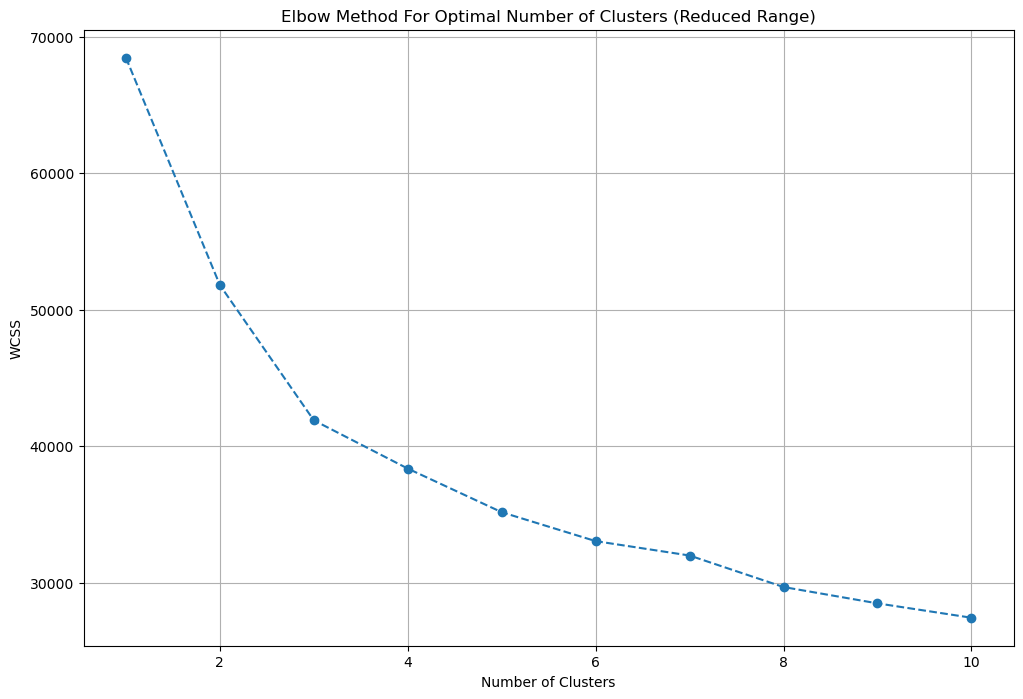

In [98]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [99]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [100]:
df = df.iloc[:,:-18]

In [101]:
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
362,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '5 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
800,"['3 Fan', '1 Exhaust Fan', '5 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
3321,[],1
2725,"['1 Exhaust Fan', '8 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
2554,NaN,1


# 5.features

In [102]:
df[['society','features']].sample(5)

,society,features
2215,ramprastha the atrium3.4 ?,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"
3699,dlf regal gardens3.9 ?,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
1940,hsiidc sidco aravali,"['Lift(s)', 'Maintenance Staff', 'Park', 'Piped-gas', 'Security Personnel']"
410,emaar mgf emerald floors premier3.8 ?,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2800,ambience caitriona,NaN


In [103]:
df['features'].isnull().sum()

635

In [105]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [108]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]
temp_df.shape

(525, 26)

In [107]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()

525

In [109]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [110]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)


In [111]:
features_binary_df.sample(5)

,24/7 Power Backup,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Terrace Garden,Theatre,Toddler Pool,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
features_binary_df.shape

(3803, 121)

In [113]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

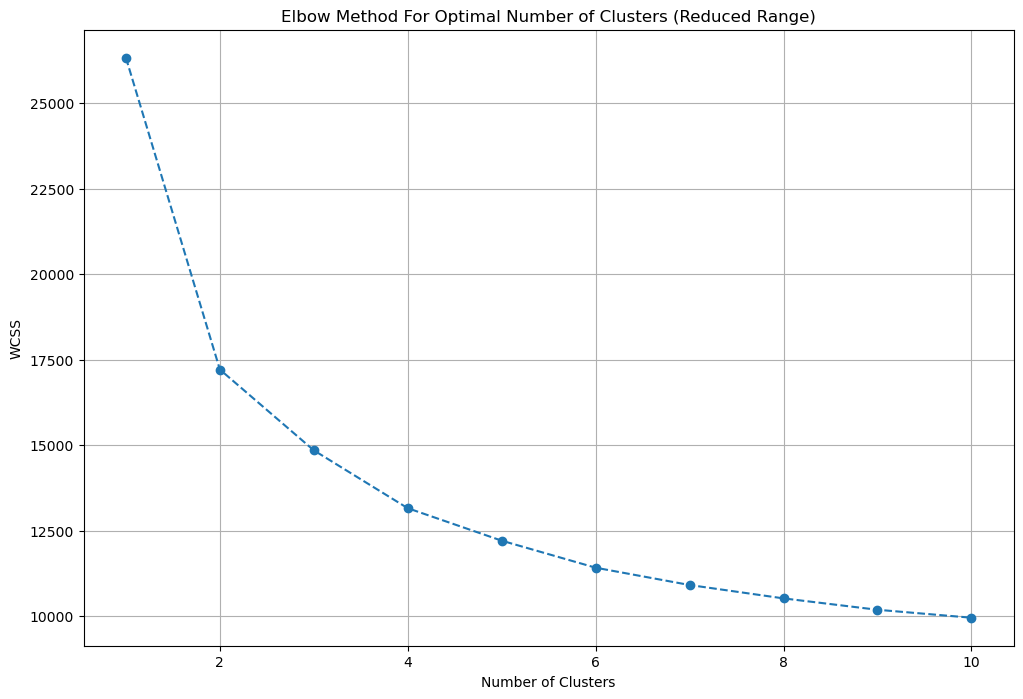

In [114]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [116]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Toddler Pool': 7,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [117]:
df['luxury_score'] = luxury_score


In [118]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,satya element one,sector 49,0.80,11111.0,720.0,Built Up area: 720 (66.89 sq.m.),1,1,1,not available,0.0,NaN,Undefined,"['Standard chartered ATM', 'Icici bank ATM', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vatsalya Clinic', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Samvit Health Care', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'SPAZE BUSINESS PARK', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'SRS Cinemas', 'SRS Cinemas', 'Haldiram', 'India', ""Domino's Pizza"", ""Nirula's"", 'Madison and Pike', 'Nook', 'Starbucks', 'Kamla International', 'Delhi Public School Primary Section', 'Gurugram University', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,720.0,NaN,0,0,0,0,0,1,[],0
1,flat,tulip violet4.3 ?,sector 69,1.31,8517.0,1538.0,Super Built up area 1538(142.88 sq.m.),3,3,2,pooja room,12.0,East,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['3 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Geyser', '12 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1538.0,NaN,NaN,0,0,0,1,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2,house,independent,sector 43,13.50,"₹ 50,000/sq.ft.",(251 sq.m.) Plot Area,Plot area 300(250.84 sq.m.),16 Bedrooms,16,3+,"Pooja Room,Study Room,Servant Room,Others",4.0,North-West,Relatively New,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Sta

In [119]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1057,flat,ss almeria,sector 84,1.50,7500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,3,3,2.0,NaN,New Property,2000.0,NaN,1700.0,0,1,0,0,0,1,108
3104,flat,emaar imperial gardens3.8 ?,sector 102,1.85,9135.0,2025.0,Carpet area: 2025 (188.13 sq.m.),3,3,3+,0.0,South-West,Relatively New,NaN,NaN,2025.0,0,1,0,0,0,2,95
598,house,independent,sector 39,0.34,"₹ 7,555/sq.ft.",(42 sq.m.) Built-up Area,Built Up area: 450 (41.81 sq.m.),1 Bedroom,1,1,1.0,NaN,Undefined,NaN,450.0,NaN,0,0,0,0,0,1,0
2095,flat,ramprastha the edge towers3.5 ?,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,2.0,North-East,Relatively New,1380.0,1300.0,1200.0,0,0,0,0,0,1,78
3140,house,independent,sector 13,0.50,"₹ 90,909/sq.ft.",(5 sq.m.) Plot Area,Plot area 55(5.11 sq.m.),12 Bedrooms,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,1,15


In [120]:
df.shape

(3803, 23)

In [121]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)